# Distribución Uniforme

In [85]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn.objects as so
from scipy.stats import uniform

En la forma estándar, la distribución es uniforme en x=0 e y=1. 
+ Utilizando los parámetros "loc" and "scale y , se obtiene la distribución uniforme en loc y loc+scale.
+ por eso en su forma estandard uniform devuelve los estadisticos de [0,1]

### Duración de la clase
Un profesor de estadística planea sus clases con tanto cuidado que sus duraciones están distribuidas uniformemente entre 50.0 y 52.0 min.  
+ Esto es, cualquier tiempo entre 50.0 y 52.0 min es posible, y todos los valores posibles tienen la misma probabilidad. 
+ Si seleccionamos aleatoriamente una de las clases y permitimos que x sea la variable aleatoria que representa la duración de esa clase, 
    + entonces todos los valores entre 50 y 52, tienen la misma probabilidad y esta probabilidad es....

Para resover este problema tengamos en cuenta que:
+ a = 50
+ b = 52
+ b - a = 2

Es decir que la función de distribución no es estandard sino que:
+ está corrida a x = a o (x = 50).
+ tiene un rango de b - a = 2
+ los valores de x van de a hasta b con la granularidad deseada por ser continua (ej. 1000)

In [86]:
# Parámetros de la distribución uniforme
a = 50.0  # límite inferior
b = 52.0  # límite superior
loc = a
scale = b - a

# Generar valores de x
x = np.linspace(a, b, 1000)

En Scipy la distribución uniforme se crea con estos parametros a y b-a.

In [87]:
# Crear la distribución uniforme
dist = uniform(loc, scale)

# Calcular por ejemplo la distribución de probabilidad PDF
pdf = dist.pdf(x)


Con la función de distribución creada es posible crear las distribuciones:
+ Probabilidad
+ Acumulada
+ Supervivencia
+ otras.

In [88]:
# Creación de un dataframe con los valores de x, probabilidad, acumulada y supervivencia
df = pd.DataFrame(
    {
        "x"   : x,
        "p"   : dist.pdf(x),
        "ac"  : dist.cdf(x),
        "1-ac": dist.sf(x),
    }
)
df.round(4)

,x,p,ac,1-ac
0,50.000,0.5,0.000,1.000
1,50.002,0.5,0.001,0.999
2,50.004,0.5,0.002,0.998
3,50.006,0.5,0.003,0.997
4,50.008,0.5,0.004,0.996
...,...,...,...,...
995,51.992,0.5,0.996,0.004
996,51.994,0.5,0.997,0.003
997,51.996,0.5,0.998,0.002
998,51.998,0.5,0.999,0.001


+ Si seleccionamos aleatoriamente una de las clases y permitimos que x sea la variable aleatoria que representa la duración de esa clase, entonces x tiene una distribución que puede graficarse como en la figura.

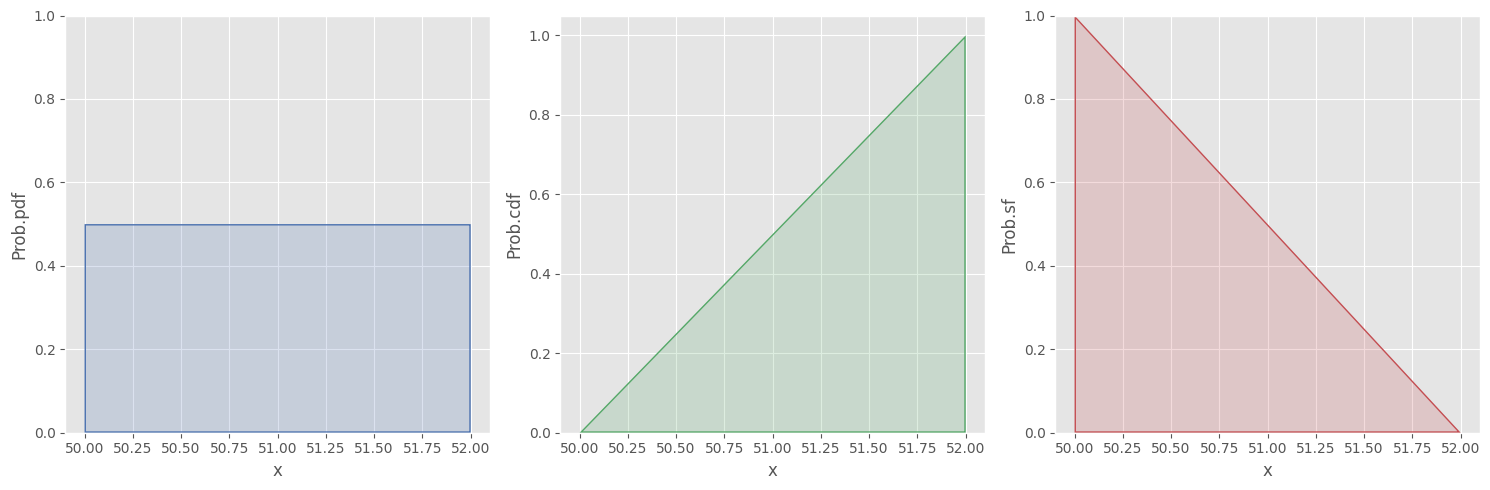

In [89]:
# Creación del grafico con seaborn objects y matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# Aplicar un estilo
# print(style.available) # use esta línea para ver estilos disponible junto con from matplotlib import style
plt.style.use('ggplot')
# Crear la figura con subfiguras
fig, (sf1, sf2, sf3) = plt.subplots(1, 3, figsize=(15, 5))

# Graficar en la primera subfigura
plot1 = (
    so.Plot(df, x="x", y="p")
    .add(so.Area())
    .label(x="x", y="Prob.pdf")
    .on(sf1)
)
plot1.plot()
sf1.set_ylim(0, 1)

# Graficar en la segunda subfigura
plot2 = (
    so.Plot(df, x="x", y="ac")
    .add(so.Area(color='C2'))
    .label(x="x", y="Prob.cdf")
    .on(sf2)
)
plot2.plot()

# Graficar en la tercera subfigura
plot3 = (
    so.Plot(df, x="x", y="1-ac")
    .add(so.Area(color='C3'))
    .label(x="x", y="Prob.sf")
    .on(sf3)
)
plot3.plot()
sf3.set_ylim(0, 1)

# Ajustar diseño
fig.tight_layout()
plt.show()

#### Consulta
Kim, quien tiene el hábito de vivir siempre de prisa, se comprometió a acudir a una entrevista de trabajo inmediatamente después de su clase de estadística. 
+ Si la clase dura más de 51.5 minutos, llegará tarde a la entrevista de trabajo. 
+ Dada la distribución uniforme de la figura, calcule la probabilidad de que una clase seleccionada al azar dure más de 51.5 minutos.

Si observamos el gráfico, la distribución se divide en 8 octavos (8/8) o cuatro cuartos (4/4) a lo largo de x.
+ 2 minutos divididos en cuatro partes da 0,5.
    + mas de 51,5 minutos implica el area que va de 51,5 hasta 52. Esto implica 0,5 minutos.
    + y 0,5 minutos por una probabilidad de 0,5 es igual a 0,25.

In [90]:
# Cálculo de la probabilidad de tardar más de 51,5 minutos

t = 51.5
# a. Mediante la función inversa a la acumulada
t_sf = df[df["x"] > 51.5]['1-ac'].max().round(3)

# b. Mediante la función acumulada
t_ac = df[df["x"] <= 51.5]['ac'].max().round(3)
t_ac_inv = 1- t_ac

print(f"Cálculo de la Probabilidad mayor o igual a {t}:")
print(f"a. Por función Survival (sf)            : {t_sf}")
print(f"b. Por función Acumulada Inversa (1-cdf): {t_ac_inv}")
# df["x"] < 51.5
df['t'] = df.apply(lambda row: 0 if row['x'] < t else row['p'], axis=1)

Cálculo de la Probabilidad mayor o igual a 51.5:
a. Por función Survival (sf)            : 0.249
b. Por función Acumulada Inversa (1-cdf): 0.25


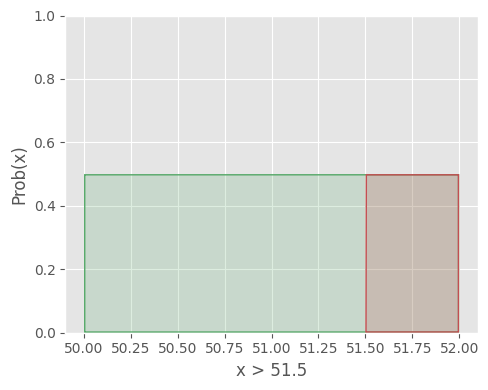

In [96]:
# Creación del grafico con seaborn objects y matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# Aplicar un estilo
# print(style.available) # use esta línea para ver estilos disponible junto con from matplotlib import style
plt.style.use('ggplot')
# Crear la figura con subfiguras
fig, (sf1) = plt.subplots(1, figsize=(5, 4))

# Graficar en la primera subfigura
plot1 = (
    so.Plot(df, x="x", y="p")
    .add(so.Area(color='g'))
    .label(x="x", y="Prob.pdf")
    .on(sf1)
)
plot1.plot()
sf1.set_ylim(0, 1)

# Graficar en la segunda subfigura
plot2 = (
    so.Plot(df, x="x", y="t")
    .add(so.Area(color='r'))
    .label(x="x > " + str(t), y="Prob(x)")
    .on(sf1)
)
plot2.plot()

# Ajustar diseño
fig.tight_layout()
plt.show()

__________________________________________________________________________________________________________________________________________________________________________